In [1]:
시그모이드 - 값이 0 < y < 1
tanh 함수 - 값이 -1 < y < 1

SyntaxError: invalid syntax (<ipython-input-1-bd44e8548d90>, line 1)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize =(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
axes[0].legend()

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target,
                                                random_state=42)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty = "l1").fit(X_train, y_train)
    print(C, lr_l1.score(X_train,y_train))
    print(C, lr_l1.score(X_test,y_test))

0.001 0.9131455399061033
0.001 0.9230769230769231
1 0.960093896713615
1 0.958041958041958
100 0.9859154929577465
100 0.9790209790209791


[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.58953794]
 

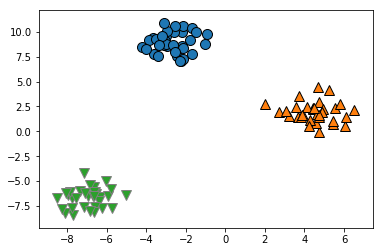

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
print(X)
print(y)

In [8]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기", linear_svm.coef_.shape)
print("절편 배열의 크기", linear_svm.intercept_.shape)

계수 배열의 크기 (3, 2)
절편 배열의 크기 (3,)


NameError: name 'linear_svm' is not defined

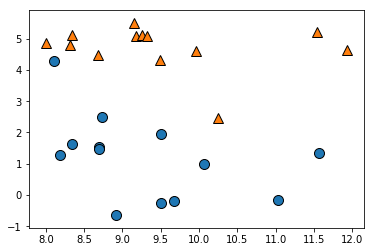

In [2]:
import numpy as np
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)

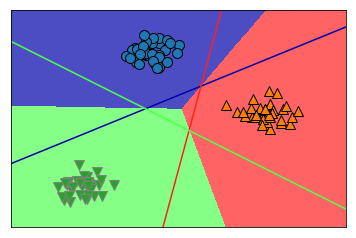

In [13]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)


In [ ]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

## 나이브 베이즈 분류기
베이즈 이론의 핵심 : 사전 확률로 사후 확률을 알 수 있다.
베이즈 정리 : 조건부 확률 = 사후 확률
ex) P(스팸(A)|광고(B)) = if p > 0.5 : 스팸 else: 스팸x 
    (사후확률)
   = P(B|A)*P(A)/P(B) [즉, A가 일어났을 때 B를 알 경우(사전확률)과 A와 B를 알았을때 사후확률을 예측할 수 있다.]
  
나이브 -> 대략적인 값
ex) "내가 오늘 받은 이메일 중 스팸 메일이 포함되어 있을 가능성은 대략 10%일 것 같다."
나이브 + 사전확률 = 나이브 베이즈 분류기
=> 사후확률로 인해 0과 1을 분류할 수 있다.

1. GaussianNB - 연속적인 데이터
2. BernoulliNB - 경우의 수가 2개일 경우 ex) 동전의 앞면이 나올 확률
3. MultinomialNb - 카운트 데이터(문장에 나타난 단어의 횟수)

In [21]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

In [22]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트 :", counts)

특성 카운트 : {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision Tree

앙상블 기법
* 분류모형의 경우
랜덤포레스트 - 보팅(다수결의 원칙)
배깅 - 결합

* 불순도와 정보이득
불순도가 낮은 쪽으로 가지치기를 해나간다.
반대로, 정보이득이 높은 쪽으로 해나간다.

*한 쪽이 0이 될 때까지 의사결정트리는 진행된다.
- 하지만 가지치기를 할 경우 그 전에 끝날 수 있다.

*divide conquer 기술
- 계층적 군집화 기술

In [4]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

font_location="C:/Windows/Fonts/H2GSRB.ttf"
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42)#stratify 타겟을 기준으로 층화추출
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
print('적합도 :', tree.score(X_train,y_train))
print('정확도 :', tree.score(X_test,y_test))

적합도 : 1.0
정확도 : 0.9230769230769231


In [3]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print('적합도 :', tree.score(X_train,y_train))
print('정확도 :', tree.score(X_test,y_test))

적합도 : 0.9882629107981221
정확도 : 0.951048951048951


In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)
import graphviz

In [6]:
import graphviz
import pydotplus
pydotplus.find_graphviz()

{'circo': 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\circo.exe',
 'dot': 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\dot.exe',
 'fdp': 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\fdp.exe',
 'neato': 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\neato.exe',
 'sfdp': 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\sfdp.exe',
 'twopi': 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\twopi.exe'}

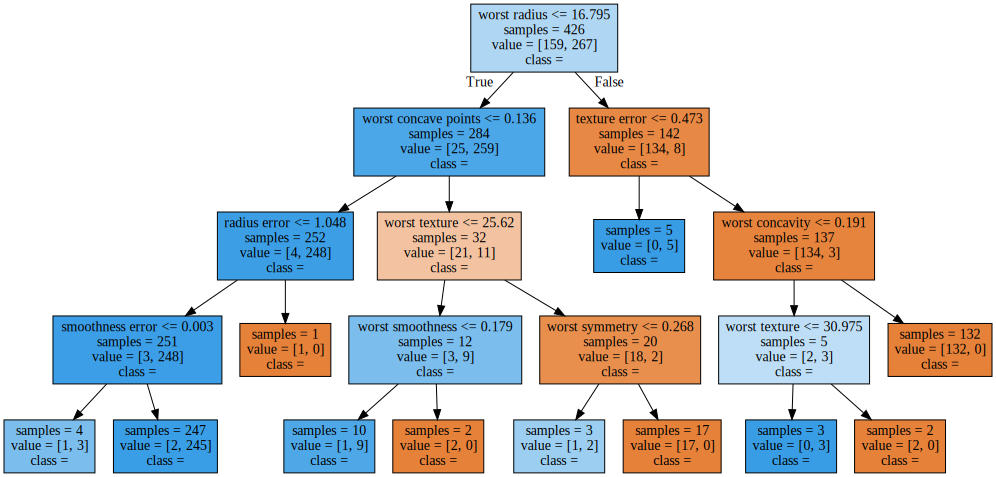

In [7]:
with open("tree_an.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [8]:
print("특성 중요도:", tree.feature_importances_)

특성 중요도: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

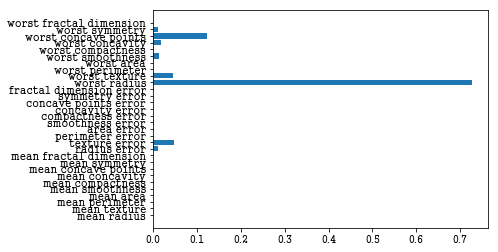

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center') # barhist
    plt.yticks(np.arange(n_features), cancer.feature_names) # yticks y축 설명
import numpy as np 
plot_feature_importances_cancer(tree)
tree.feature_importances_

In [12]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
import pandas as pd
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [22]:
df_importance=pd.DataFrame(tree.feature_importances_, index=cancer.feature_names)
df_importance.T


df_importance[df_importance>0.0]

,0
mean radius,NaN
mean texture,NaN
mean perimeter,NaN
mean area,NaN
mean smoothness,NaN
mean compactness,NaN
mean concavity,NaN
mean concave points,NaN
mean symmetry,NaN
mean fractal dimension,NaN


Feature importances: [0. 1.]


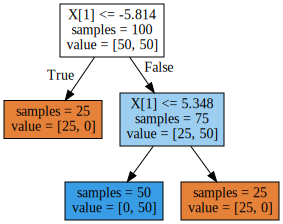

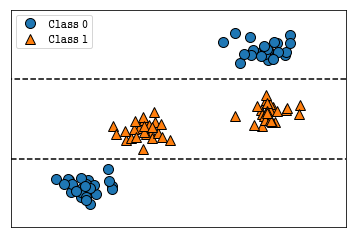

In [23]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## Decision Tree를 이용한 수치예측
수치예측에서의 문제점
- 주어진 데이터 범위 안에서의 트리를 만들어서 수행되기 때문에
그 범위 안에서만 예측하고, 아예 벗어난 이상치가 들어올 경우 예측을 하지 못한다.

In [11]:
import os
import sys
import mglearn
import numpy as np

In [6]:
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

In [7]:
ram_prices.head

<bound method NDFrame.head of      Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
5             5  1973.00  3.993600e+05
6             6  1974.00  3.145730e+05
7             7  1975.00  4.218880e+05
8             8  1975.08  1.802240e+05
9             9  1975.25  6.758400e+04
10           10  1975.75  4.992000e+04
11           11  1976.00  4.070400e+04
12           12  1976.17  4.896000e+04
13           13  1976.42  2.304000e+04
14           14  1976.58  3.200000e+04
15           15  1977.08  3.680000e+04
16           16  1978.17  2.800000e+04
17           17  1978.25  2.944000e+04
18           18  1978.33  1.920000e+04
19           19  1978.50  2.400000e+04
20           20  1978.58  1.600000e+04
21           21  1978.75  1.520000e+04
22           22  1979.00  1.052800e+04
23           23  1979.75  6.704000

Text(0,0.5,'가격')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


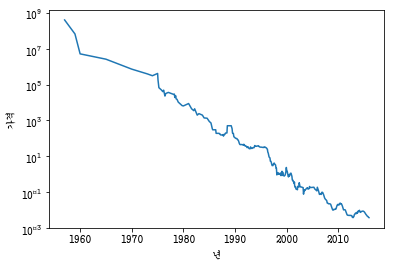

In [8]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격")

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [14]:
X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)
print(data_train.date)
print(X_train)
print(data_train.date.reshape(-1,1))

0      1957.00
1      1959.00
2      1960.00
3      1965.00
4      1970.00
5      1973.00
6      1974.00
7      1975.00
8      1975.08
9      1975.25
10     1975.75
11     1976.00
12     1976.17
13     1976.42
14     1976.58
15     1977.08
16     1978.17
17     1978.25
18     1978.33
19     1978.50
20     1978.58
21     1978.75
22     1979.00
23     1979.75
24     1980.00
25     1981.00
26     1981.58
27     1982.00
28     1982.17
29     1982.67
        ...   
172    1997.25
173    1997.33
174    1997.42
175    1997.50
176    1997.58
177    1997.67
178    1997.75
179    1997.83
180    1997.92
181    1998.00
182    1998.08
183    1998.17
184    1998.25
185    1998.33
186    1998.42
187    1998.58
188    1998.67
189    1998.75
190    1998.83
191    1998.92
192    1999.08
193    1999.13
194    1999.17
195    1999.25
196    1999.33
197    1999.50
198    1999.67
199    1999.75
200    1999.83
201    1999.92
Name: date, Length: 202, dtype: float64
[[1957.  ]
 [1959.  ]
 [1960.  ]
 [1965.  ]
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [39]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

In [41]:
X_all = ram_prices.date[:, np.newaxis]
X_all

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

In [42]:
pred_tree = tree.predict(X_all)
pred_lr  = linear_reg.predict(X_all)

In [43]:
price_tree =np.exp(pred_tree)
price_lr =np.exp(pred_lr)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:854: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:855: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


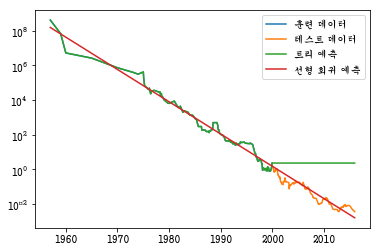

In [44]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측")
plt.legend()
#정해진 범위에서 지났을 때 예측을 못함을 알 수 있음.

## Random Forest
* 부트스트랩
- 기존 데이터를 일정한 크기로 나눈 후 중복 허용으로 랜덤 샘플링
- 그 후에 의사결정트리를 이용
- 값들의 평균값을 이용하기 때문에 감쇄현상 
- 데이터들과 feature들을 모두 다양하게 섞었을 때 성능 향상
- max_features : 들어갈 특성 선택

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples = 100, noise = 0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

In [46]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)

In [48]:
forest
forest.fit(X_train,y_train)
#중요 - max_depth, max_features

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

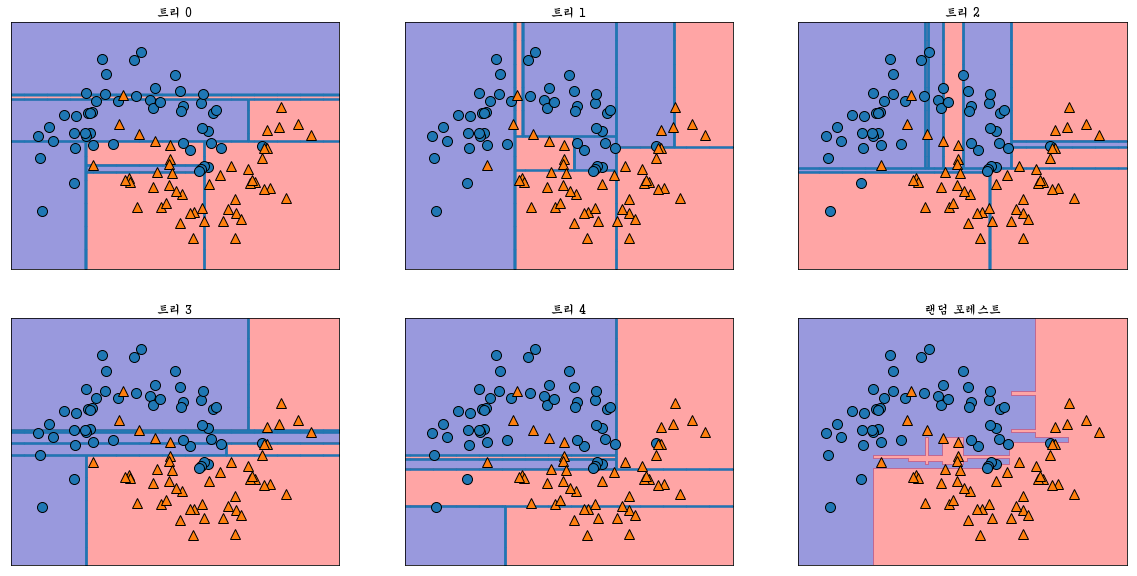

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1], y)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest=RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("훈련 셋 적합도 :", forest.score(X_train,y_train))
print("테스트 셋 정확도 :", forest.score(X_test,y_test))

훈련 셋 적합도 : 1.0
테스트 셋 정확도 : 0.972027972027972


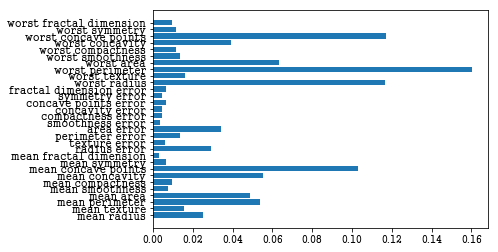

In [55]:
plot_feature_importances_cancer(forest)